## Challenge Set 5 (challenges #1-#10)

**Topic: Classification  
Date: 8/1/2016  
Name: Marc Gameroff**  

Table of Contents:
- [**Challenge 1**](#1)
- [**Challenge 2**](#2)
- [**Challenge 3**](#3)
- [**Challenge 4**](#4)
- [**Challenge 5**](#5)
- [**Challenge 6**](#6)
- [**Challenge 7**](#7)
- [**Challenge 8**](#8)
- [**Challenge 9**](#9)
- [**Challenge 10**](#10)    **(ADDED 8/7/2016)**

In [417]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [428]:
#the csv file has no header row
df = pd.read_csv('~/house-votes-84.data.txt')

In [429]:
df.columns = ['class-label',
    'handicapped-infants',
    'water-project-cost-sharing', 
    'adoption-of-the-budget-resolution', 
    'physician-fee-freeze', 
    'el-salvador-aid', 
    'religious-groups-in-schools', 
    'anti-satellite-test-ban', 
    'aid-to-nicaraguan-contras',
    'mx-missile', 
    'immigration', 
    'synfuels-corporation-cutback', 
    'education-spending', 
    'superfund-right-to-sue', 
    'crime', 
    'duty-free-exports', 
    'export-administration-act-south-africa']

### <a id='1'></a>Challenge 1:

In [430]:
df = df.replace('y', 1)
df = df.replace('n', 0)
df = df.replace('?', np.nan)
df.head()

,class-label,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
1,democrat,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
2,democrat,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
3,democrat,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1
4,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1


In [434]:
y = df.iloc[:,:1]
y = np.asarray(y)
X = df.iloc[:,1:]
X = X.apply(lambda x: x.fillna(x.mean()),axis=0)
X.head()
y

array([['republican'],
       ['democrat'],
       ['democrat'],
       ['democrat'],
       ['democrat'],
       ['democrat'],
       ['republican'],
       ['republican'],
       ['democrat'],
       ['republican'],
       ['republican'],
       ['democrat'],
       ['democrat'],
       ['republican'],
       ['republican'],
       ['democrat'],
       ['democrat'],
       ['republican'],
       ['democrat'],
       ['democrat'],
       ['democrat'],
       ['democrat'],
       ['democrat'],
       ['democrat'],
       ['democrat'],
       ['democrat'],
       ['democrat'],
       ['republican'],
       ['democrat'],
       ['republican'],
       ['democrat'],
       ['democrat'],
       ['republican'],
       ['democrat'],
       ['republican'],
       ['republican'],
       ['republican'],
       ['republican'],
       ['democrat'],
       ['democrat'],
       ['democrat'],
       ['democrat'],
       ['democrat'],
       ['democrat'],
       ['democrat'],
       ['democrat'],
    

In [432]:
y.shape

(434, 1)

### <a id='2'></a>Challenge 2:

In [423]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

### <a id='3'></a>Challenge 3:

In [435]:
d1 = {}
for nabes in range (1,21):
    knc = KNeighborsClassifier(n_neighbors = nabes)
    knc.fit(X_train, y_train).score(X_test, y_test)
    y_pred = knc.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    d1[nabes] = [nabes, acc]

In [425]:
x, y1 = zip(*d1.values())

(0.88, 0.95)

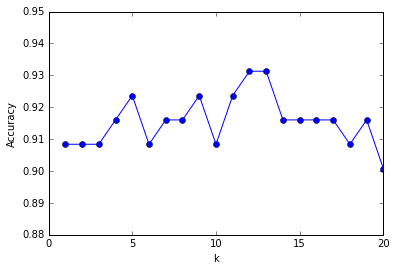

In [426]:
plt.plot(x,y1,'ob')
plt.plot(x,y1,'-b')
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.ylim( 0.88, 0.95 ) 

In [427]:
d1

{1: [1, 0.90839694656488545],
 2: [2, 0.90839694656488545],
 3: [3, 0.90839694656488545],
 4: [4, 0.91603053435114501],
 5: [5, 0.92366412213740456],
 6: [6, 0.90839694656488545],
 7: [7, 0.91603053435114501],
 8: [8, 0.91603053435114501],
 9: [9, 0.92366412213740456],
 10: [10, 0.90839694656488545],
 11: [11, 0.92366412213740456],
 12: [12, 0.93129770992366412],
 13: [13, 0.93129770992366412],
 14: [14, 0.91603053435114501],
 15: [15, 0.91603053435114501],
 16: [16, 0.91603053435114501],
 17: [17, 0.91603053435114501],
 18: [18, 0.90839694656488545],
 19: [19, 0.91603053435114501],
 20: [20, 0.9007633587786259]}

Maximum accuracy (0.931) is achieved at k = 12 (tied with k = 13).

### <a id='4'></a>Challenge 4:


In [13]:
from sklearn.linear_model import LogisticRegression

ps = ['l1','l2']
cs = [.001, .01, .1, 1, 10, 100, 1000]
d2 = {}

for p in ps:
    for c in cs:
        lgr = LogisticRegression(penalty= p, C = c)
        lgr.fit(X_train, y_train).score(X_test, y_test)
        y_pred = lgr.predict(X_test)
        acc = accuracy_score(y_test,y_pred)
        d2[(c,p)] = acc
d2

{(0.001, 'l1'): 0.60305343511450382,
 (0.001, 'l2'): 0.86259541984732824,
 (0.01, 'l1'): 0.60305343511450382,
 (0.01, 'l2'): 0.87786259541984735,
 (0.1, 'l1'): 0.92366412213740456,
 (0.1, 'l2'): 0.93129770992366412,
 (1, 'l1'): 0.96946564885496178,
 (1, 'l2'): 0.96183206106870234,
 (10, 'l1'): 0.96183206106870234,
 (10, 'l2'): 0.96183206106870234,
 (100, 'l1'): 0.95419847328244278,
 (100, 'l2'): 0.96183206106870234,
 (1000, 'l1'): 0.95419847328244278,
 (1000, 'l2'): 0.95419847328244278}

Maximum accuracy (0.969) is achieved using C = 1 and penalty type 'L1'.

### <a id='5'></a>Challenge 5:


There are 267 democrats and 167 Republicans.


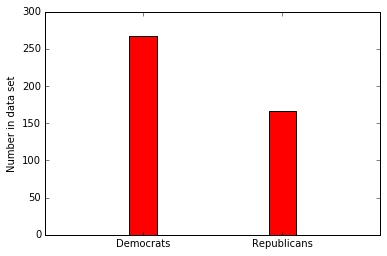

In [14]:
num_dem = sum(df['class-label']=='democrat')
num_rep = sum(df['class-label']=='republican')
y_axis = [num_dem,num_rep]
x_axis = range(len(y_axis))
plt.xticks( np.arange(2), ('Democrats', 'Republicans') )
plt.bar(x_axis, y_axis, width=0.2, color='red', align='center')
plt.margins(.5,0)
plt.ylim(0,300)
plt.ylabel('Number in data set')
print ('There are',num_dem,'democrats and', num_rep, 'Republicans.')

In [15]:
def predict_party(party):
    n = None
    string = None
    if party.upper() == "DEMOCRAT":
        string = 'democrat'
    elif party.upper() == "REPUBLICAN":
        string = 'republican'
    Y_PRED = np.tile(string, 434)
    return Y_PRED
    print(results.summary())
    
y = np.ravel(y)
knc = KNeighborsClassifier(n_neighbors = 12)
knc.fit(X, y)
y_pred_dem = predict_party('DEMOCRAT')
acc = accuracy_score(y,y_pred_dem)

print("Accuracy when always predicting DEMOCRAT: ",acc)
    
y = np.ravel(y)
knc = KNeighborsClassifier(n_neighbors = 12)
knc.fit(X, y)
y_pred_rep = predict_party('REPUBLICAN')
acc = accuracy_score(y,y_pred_rep)

print("Accuracy when always predicting REPUBLICAN: ",acc)  

Accuracy when always predicting DEMOCRAT:  0.615207373272
Accuracy when always predicting REPUBLICAN:  0.384792626728


### <a id='6'></a>Challenge 6:

In [16]:
todraw = [['K', 'KNN_Accuracy', 'LogReg_Accuracy', 'DemSimple_Accuracy','RepSimple_Accuracy']]
for k in range (1,21):
    todraw.append( [k, d1[k][1], .969, .615, .384] )

headers = todraw.pop(0)
dfdraw = pd.DataFrame(todraw, columns=headers)

In [17]:
dfdraw.head()

,K,KNN_Accuracy,LogReg_Accuracy,DemSimple_Accuracy,RepSimple_Accuracy
0,1,0.908397,0.969,0.615,0.384
1,2,0.908397,0.969,0.615,0.384
2,3,0.908397,0.969,0.615,0.384
3,4,0.916031,0.969,0.615,0.384
4,5,0.923664,0.969,0.615,0.384


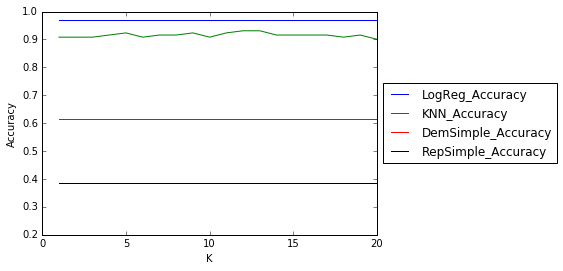

In [18]:
plt.plot(dfdraw.K,dfdraw.LogReg_Accuracy,'-',color='blue')
plt.plot(dfdraw.K,dfdraw.KNN_Accuracy,'-g')
plt.plot(dfdraw.K,dfdraw.DemSimple_Accuracy,'-r')
plt.plot(dfdraw.K,dfdraw.RepSimple_Accuracy,'-', color='black')
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.ylim( 0.2, 1 ) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### <a id='7'></a>Challenge 7:


In [19]:
from sklearn.learning_curve import learning_curve

In [20]:
train_sizes, train_scores, valid_scores = learning_curve(LogisticRegression(), X, y, \
       train_sizes=np.linspace(.1, 1.0, 5))
train_cv_err = np.mean(train_scores, axis=1)
test_cv_err = np.mean(valid_scores, axis=1)
mat = np.transpose(np.vstack((train_sizes,train_cv_err,test_cv_err)))

In [21]:
columns = ['m','train_cv_err','test_cv_err']
m = pd.DataFrame(mat,columns=columns)
m

,m,train_cv_err,test_cv_err
0,28,0.976190,0.916986
1,93,0.978495,0.928496
2,158,0.978903,0.940038
3,223,0.979073,0.951564
4,289,0.968858,0.963091


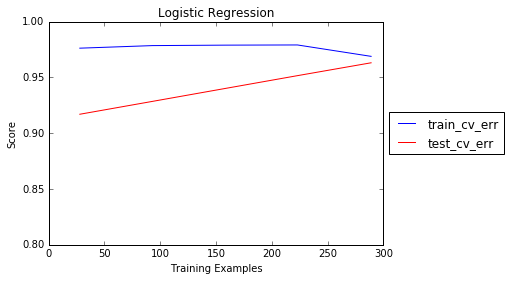

In [22]:
#plt.plot(m.m, m.train_cv_err,'o',color='blue')
plt.plot(m.m, m.train_cv_err,'-',color='blue')
#plt.plot(m.m, m.test_cv_err,'o',color='red')
plt.plot(m.m, m.test_cv_err,'-',color='red')
plt.ylabel('Score')
plt.xlabel('Training Examples')
plt.ylim( 0.80, 1 )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Logistic Regression")

In [23]:
train_sizes, train_scores, valid_scores = learning_curve(KNeighborsClassifier(n_neighbors=12), X, y, \
       train_sizes=np.linspace(.1, 1.0, 5))
train_cv_err = np.mean(train_scores, axis=1)
test_cv_err = np.mean(valid_scores, axis=1)
mat2 = np.transpose(np.vstack((train_sizes,train_cv_err,test_cv_err)))

In [24]:
columns = ['m','train_cv_err','test_cv_err']
m2 = pd.DataFrame(mat2,columns=columns)
m2

,m,train_cv_err,test_cv_err
0,28,0.845238,0.907775
1,93,0.931900,0.910105
2,158,0.934599,0.905540
3,223,0.940209,0.917050
4,289,0.937716,0.926261


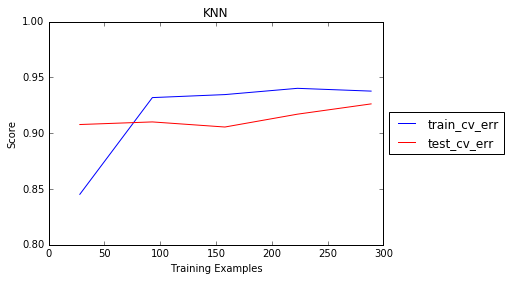

In [25]:
#plt.plot(m2.m, m2.train_cv_err,'o',color='blue')
plt.plot(m2.m, m2.train_cv_err,'-',color='blue')
#plt.plot(m2.m, m2.test_cv_err,'o',color='red')
plt.plot(m2.m, m2.test_cv_err,'-',color='red')
plt.ylabel('Score')
plt.xlabel('Training Examples')
plt.ylim( 0.80, 1 )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("KNN")

### <a id='8'></a>Challenge 8:


In [192]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)
#y_train = np.ravel(y_train)
#y_test = np.ravel(y_test)

In [193]:
naive = GaussianNB()
naive.fit(X_train, y_train).score(X_test, y_test)
y_pred = naive.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print ("Accuracy of Gaussian Naive Bayes: ", acc)

Accuracy of Gaussian Naive Bayes:  0.908396946565


In [28]:
svc = SVC()
svc.fit(X_train, y_train).score(X_test, y_test)
y_pred = svc.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print ("Accuracy of SVM Classifier: ", acc)

Accuracy of SVM Classifier:  0.954198473282


In [29]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train).score(X_test, y_test)
y_pred = dectree.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print ("Accuracy of Decision Tree: ", acc)

Accuracy of Decision Tree:  0.923664122137


In [30]:
randforest = RandomForestClassifier()
randforest.fit(X_train, y_train).score(X_test, y_test)
y_pred = randforest.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print ("Accuracy of Random Forest: " , acc)

Accuracy of Random Forest:  0.916030534351


### <a id='9'></a>Challenge 9:

In [194]:
from sklearn import cross_validation

In [205]:
logreg = LogisticRegression()
naive_bayes = GaussianNB()
svc = SVC()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knc = KNeighborsClassifier(n_neighbors = 12)

score_logreg = (cross_validation.cross_val_score(logreg, X, y.ravel(), cv=5)).mean()
score_naive_bayes = (cross_validation.cross_val_score(naive_bayes, X, y.ravel(), cv=5)).mean()
score_svc = (cross_validation.cross_val_score(svc, X, y.ravel(), cv=5)).mean()
score_rf = (cross_validation.cross_val_score(rf, X, y.ravel(), cv=5)).mean()
score_dt = (cross_validation.cross_val_score(dt, X, y.ravel(), cv=5)).mean()
score_knc = (cross_validation.cross_val_score(knc, X, y.ravel(), cv=5)).mean()

In [191]:
print (score_logreg)
print (score_naive_bayes)
print (score_svc)
print (score_rf)
print (score_dt)
print (score_knc)

0.958403805497
0.940010570825
0.953858350951
0.939957716702
0.944608879493
0.926374207188


### <a id='10'></a>Challenge 10

In [206]:
#the csv file has no header row
df = pd.read_csv('~/house-votes-84.data.txt')

In [207]:
df.head(2)

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n


In [208]:
df.columns = ['class-label',
    'handicapped-infants',
    'water-project-cost-sharing', 
    'adoption-of-the-budget-resolution', 
    'physician-fee-freeze', 
    'el-salvador-aid', 
    'religious-groups-in-schools', 
    'anti-satellite-test-ban', 
    'aid-to-nicaraguan-contras',
    'mx-missile', 
    'immigration', 
    'synfuels-corporation-cutback', 
    'education-spending', 
    'superfund-right-to-sue', 
    'crime', 
    'duty-free-exports', 
    'export-administration-act-south-africa']

In [209]:
df = df.replace('y', 1)
df = df.replace('n', 0)
df = df.replace('?', np.nan)

df.drop('class-label',axis=1, inplace=True)
df = df.apply(lambda x:x.fillna(x.mode().index[0]))

In [210]:
df.head(2)

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
1,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0


In [211]:
y = df['mx-missile']
df.drop(['mx-missile'], axis = 1 , inplace= True)
df.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0
1,0,1,1,0,1,1,0,0,0,1,0,1,1,0,0
2,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1
3,1,1,1,0,1,1,0,0,0,1,0,1,1,1,1
4,0,1,1,0,1,1,0,0,0,0,0,1,1,1,1


In [213]:
logr = LogisticRegression()
score_logr = cross_validation.cross_val_score(logr, df, y)
print (score_logreg)

0.958403805497
